# Analysis

In [1]:
%matplotlib inline

import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Set path to load files from
res_path = '/Users/tom/Documents/GitCode/Confidence_Scanner/scripts/results/'
#res_path = '/Users/wdfox/Documents/GitCode/Confidence_Scanner/scripts/results/'

In [3]:
# Load files
dfs = []
for dat_type in ['Papers', 'PRs']:
    
    d1 = pd.read_csv(os.path.join(res_path, dat_type + '_readability.csv'))
    d2 = pd.read_csv(os.path.join(res_path, dat_type + '_analysis.csv'))
    d3 = pd.read_csv(os.path.join(res_path, dat_type + '_metadata.csv'))
    
    # Merge dataframes - to get all features for particular document type
    dft = pd.merge(d1, d2, on=['id', 'term'])
    df = pd.merge(dft, d3, on=['id', 'term'])
    df['dat_type'] = dat_type
    
    dfs.append(df)

In [4]:
# Combine into one joint df, with all data (papers and press releases)
df = pd.concat(dfs)

In [5]:
## Cleans ups
# Drop old column names (no data)
df.set_index('id', inplace=True)
df = df.drop(['fk', 'consen'], axis=1)
df.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
# Check out a few rows
df.head()

,term,smog,ar,fkg,fks,lwf,vader,liu,subj,liwc,n_words,has_source_link,has_article_link,has_other_link,region,journal,dat_type
id,,,,,,,,,,,,,,,,,
29373119,autism,16.6,18.2,15.2,18.86,7.500000,1.0194,-1.0,3.0,6.0,143,NaN,NaN,NaN,NaN,Biological psychiatry,Papers
29369294,autism,18.2,22.2,17.7,12.46,7.916667,-2.5924,-2.0,5.0,6.0,189,NaN,NaN,NaN,NaN,Acta neurobiologiae experimentalis,Papers
29367178,autism,15.1,14.8,13.1,35.07,7.000000,0.9111,2.0,-2.0,8.0,125,NaN,NaN,NaN,NaN,Epilepsy research,Papers
29361396,autism,21.3,23.7,19.8,12.30,18.000000,-0.9329,-3.0,0.0,0.0,116,NaN,NaN,NaN,NaN,Neuromuscular disorders : NMD,Papers
29358944,autism,17.3,18.5,16.5,21.02,13.125000,0.0173,1.0,-1.0,6.0,101,NaN,NaN,NaN,NaN,Frontiers in genetics,Papers


In [7]:
# Check how many there are of each data type
df['dat_type'].value_counts()

Papers    9913
PRs       5659
Name: dat_type, dtype: int64

In [8]:
# Check how many documents there are for each term
df['term'].value_counts()

diabetes         2564
stroke           1988
perception       1681
vaccines         1417
dementia         1318
cognition        1312
autism           1277
hypertension     1243
epilepsy         1078
consciousness    1035
optogenetics      659
Name: term, dtype: int64

In [9]:
# Check how many of each document there are, split up by document type and term
df.groupby(['dat_type', 'term']).size()

dat_type  term         
PRs       autism            321
          cognition         346
          consciousness      81
          dementia          391
          diabetes         1694
          epilepsy          201
          hypertension      337
          optogenetics       53
          perception        701
          stroke           1078
          vaccines          456
Papers    autism            956
          cognition         966
          consciousness     954
          dementia          927
          diabetes          870
          epilepsy          877
          hypertension      906
          optogenetics      606
          perception        980
          stroke            910
          vaccines          961
dtype: int64

In [10]:
# Descriptive statistics
df.describe()

,smog,ar,fkg,fks,lwf,vader,liu,subj,liwc,n_words,has_source_link,has_article_link,has_other_link
count,15572.000000,15572.000000,15572.000000,15572.000000,15572.000000,15572.000000,15572.000000,15572.000000,15572.000000,15572.000000,5659.000000,5659.000000,5659.000000
mean,15.323029,17.077460,13.951554,33.341476,11.187369,0.659905,-0.430067,-1.958515,3.245055,200.848895,0.359781,0.452200,0.034458
std,2.431701,3.352809,2.870670,14.360262,3.908731,2.658634,4.521798,4.695214,5.437597,137.444647,0.479978,0.497754,0.182420
min,0.000000,2.100000,-3.500000,-193.840000,0.500000,-15.723300,-27.000000,-39.000000,-32.000000,0.000000,0.000000,0.000000,0.000000
25%,14.000000,15.000000,12.200000,24.270000,8.250000,-0.656975,-3.000000,-5.000000,0.000000,115.000000,0.000000,0.000000,0.000000
50%,15.300000,17.000000,13.900000,34.290000,10.900000,0.544750,0.000000,-2.000000,3.000000,150.000000,0.000000,0.000000,0.000000
75%,16.800000,19.000000,15.700000,43.060000,13.250000,1.824900,2.000000,1.000000,6.000000,264.000000,1.000000,1.000000,0.000000
max,26.200000,68.500000,54.800000,126.530000,59.000000,40.804400,38.000000,32.000000,47.000000,2310.000000,1.000000,1.000000,1.000000


In [11]:
# Check out the descriptive statistics separated out by dat_type
pd.set_option('display.max_columns', 100)
df.groupby(['dat_type']).describe()

ar                                                       fkg  \
           count       mean       std  min   25%   50%   75%   max   count   
dat_type                                                                     
PRs       5659.0  16.880633  2.616787  8.3  15.2  16.7  18.3  46.5  5659.0   
Papers    9913.0  17.189821  3.703481  2.1  14.8  17.2  19.5  68.5  9913.0   

                                                               fks             \
               mean       std  min   25%   50%   75%   max   count       mean   
dat_type                                                                        
PRs       13.674819  2.091448 -0.6  12.3  13.6  14.9  41.0  5659.0  39.691338   
Papers    14.109533  3.221807 -3.5  12.0  14.2  16.2  54.8  9913.0  29.716552   

                                                         has_article_link  \
                std     min    25%    50%    75%     max            count   
dat_type                                                                    
PRs       10.316009 -193.84  33.46  40.18  46.91  102.78           5659.0   
Papers    15.067943  -91.30  19.87  29.59  39.43  126.53              0.0   

                                                    has_other_link            \
            mean       std  min  25%  50%  75%  max          count      mean   
dat_type                                                                       
PRs       0.4522  0.497754  0.0  0.0  0.0  1.0  1.0         5659.0  0.034458   
Papers       NaN       NaN  NaN  NaN  NaN  NaN  NaN            0.0       NaN   

                                           has_source_link            \
              std  min  25%  50%  75%  max           count      mean   
dat_type                                                               
PRs       0.18242  0.0  0.0  0.0  0.0  1.0          5659.0  0.359781   
Papers        NaN  NaN  NaN  NaN  NaN  NaN             0.0       NaN   

                                                liu             ...          \
               std  min  25%  50%  75%  max   count      mean   ...     75%   
dat_type                                                        ...           
PRs       0.479978  0.0  0.0  0.0  1.0  1.0  5659.0 -0.347941   ...     4.0   
Papers         NaN  NaN  NaN  NaN  NaN  NaN  9913.0 -0.476949   ...     2.0   

                  liwc                                                    lwf  \
           max   count      mean       std   min  25%  50%  75%   max   count   
dat_type                                                                        
PRs       38.0  5659.0  4.652942  7.290546 -32.0  0.0  4.0  9.0  47.0  5659.0   
Papers    11.0  9913.0  2.441340  3.785514 -13.0  0.0  2.0  5.0  23.0  9913.0   

                                                                        \
               mean       std       min    25%   50%        75%    max   
dat_type                                                                 
PRs       12.623308  4.075042  0.500000  10.20  12.5  14.854167  30.25   
Papers    10.367639  3.559853  0.833333   7.75  10.4  12.500000  59.00   

         n_words                                                            \
           count        mean         std  min    25%    50%    75%     max   
dat_type                                                                     
PRs       5659.0  329.602580  148.646881  2.0  239.0  309.0  396.0  2310.0   
Papers    9913.0  127.347725   46.862112  0.0   99.0  126.0  149.0  1095.0   

            smog                                                      subj  \
           count       mean       std  min   25%   50%   75%   max   count   
dat_type                                                                     
PRs       5659.0  14.999788  1.743512  0.0  14.0  14.9  16.0  23.0  5659.0   
Papers    9913.0  15.507556  2.731342  0.0  13.9  15.7  17.3  26.2  9913.0   

                                                          vader            \
              mean       std   min  2

## PR specific Stuff

In [12]:
# Check documents by region (PR only)
df['region'].value_counts()

namerica     4258
europe       1108
asia          168
australia      45
africa         37
samerica       16
Name: region, dtype: int64

In [13]:
# Check how many have links
print('Article Link: ', '\t', df['has_article_link'].mean())
print('Source Link: ', '\t', df['has_source_link'].mean())
print('Other Link: ', '\t', df['has_other_link'].mean())

Article Link:  	 0.4522000353419332
Source Link:  	 0.3597808800141368
Other Link:  	 0.03445838487365259


## Analyses

In [14]:
# Check correlation between metrics
corrs = df.corr()
corrs

,smog,ar,fkg,fks,lwf,vader,liu,subj,liwc,n_words,has_source_link,has_article_link,has_other_link
smog,1.000000,0.665120,0.792806,-0.726159,0.296118,0.031964,0.056499,0.061989,-0.046770,-0.060341,-0.031884,0.039396,0.013138
ar,0.665120,1.000000,0.892484,-0.759913,0.431250,0.029303,0.055966,0.055518,-0.043981,-0.054051,0.004381,-0.011797,0.039090
fkg,0.792806,0.892484,1.000000,-0.887701,0.447228,0.035470,0.065473,0.060126,-0.055660,-0.069988,-0.031908,0.016560,0.012605
fks,-0.726159,-0.759913,-0.887701,1.000000,-0.197406,0.025158,-0.041089,-0.129386,0.095517,0.273980,0.000168,-0.019674,-0.056637
lwf,0.296118,0.431250,0.447228,-0.197406,1.000000,0.076693,0.044054,-0.079874,0.044682,0.253099,-0.062961,-0.044928,-0.039959
vader,0.031964,0.029303,0.035470,0.025158,0.076693,1.000000,0.681322,0.005589,0.162456,0.114580,0.022026,0.021397,-0.031492
liu,0.056499,0.055966,0.065473,-0.041089,0.044054,0.681322,1.000000,0.062198,0.122838,0.002515,0.036508,0.009071,-0.027340
subj,0.061989,0.055518,0.060126,-0.129386,-0.079874,0.005589,0.062198,1.000000,-0.173423,-0.190433,0.022194,0.019144,-0.003135
liwc,-0.046770,-0.043981,-0.055660,0.095517,0.044682,0.162456,0.122838,-0.173423,1.000000,0.158358,-0.009869,-0.004377,-0.028217
n_words,-0.060341,-0.054051,-0.069988,0.273980,0.253099,0.114580,0.002515,-0.190433,0.158358,1.000000,-0.027274,-0.085796,0.103919


In [15]:
plt.imshow?

In [16]:
list(corrs.columns)

['smog',
 'ar',
 'fkg',
 'fks',
 'lwf',
 'vader',
 'liu',
 'subj',
 'liwc',
 'n_words',
 'has_source_link',
 'has_article_link',
 'has_other_link']

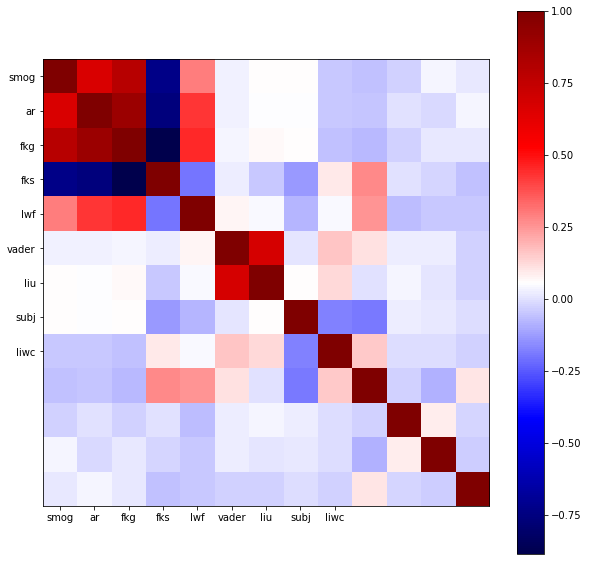

In [17]:
# Plot the correlation matrix
plt.figure(figsize=[10, 10])
plt.imshow(corrs.values, cmap='seismic');
plt.xticks(range(9), list(corrs.columns));
plt.yticks(range(9), list(corrs.columns));
plt.colorbar()

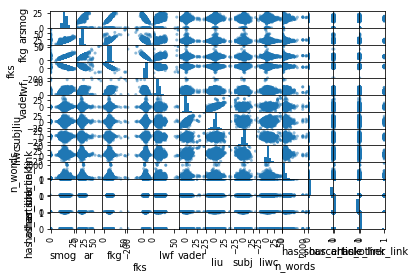

In [18]:
# Plot relations between metrics
pd.plotting.scatter_matrix(df);

In [19]:
# Check the average scores for each measure across different terms
avgs = df.groupby(['term', 'dat_type']).mean()
avgs

smog         ar        fkg        fks        lwf  \
term          dat_type                                                          
autism        PRs       15.296262  17.042991  13.900000  38.743333  12.761972   
              Papers    16.020816  18.008159  14.839226  26.819498  10.908569   
cognition     PRs       15.184682  16.876301  13.736994  39.213844  12.465154   
              Papers    16.123602  17.990683  14.924741  26.081812  10.565741   
consciousness PRs       15.144444  17.058025  13.870370  39.353210  13.161464   
              Papers    15.570755  17.203249  14.133438  29.745629   9.983583   
dementia      PRs       15.246803  16.989770  13.882864  38.867621  12.596582   
              Papers    15.703560  17.230313  14.215318  29.156861  10.117829   
diabetes      PRs       15.030401  16.933884  13.700000  39.376930  12.662626   
              Papers    14.739310  15.955977  13.075057  33.662092   9.839773   
epilepsy      PRs       14.710448  16.458209  13.315423  42.030547  12.943061   
              Papers    15.049715  17.183694  13.748233  31.540901  10.123229   
hypertension  PRs       15.107418  17.089911  13.836202  38.414510  12.980228   
              Papers    14.529139  15.923068  12.912583  33.916115  10.074638   
optogenetics  PRs       15.230189  16.850943  13.767925  39.246038  11.656289   
              Papers    17.197525  19.542739  16.568812  17.602442  11.595141   
perception    PRs       15.020685  16.801427  13.682311  40.083852  12.224617   
              Papers    15.699898  17.101939  14.230816  29.836969  10.361396   
stroke        PRs       14.741187  16.902597  13.568275  40.374564  13.014046   
              Papers    14.499121  15.903297  12.730440  35.919044  10.135046   
vaccines      PRs       14.900000  16.551535  13.431140  40.401053  11.823812   
              Papers    15.854735  17.659313  14.464516  29.210135  10.682344   

                           vader       liu      subj      liwc     n_words  \
term          dat_type                                                       
autism        PRs       1.859850  0.000000 -3.566978  5.707165  347.579439   
              Papers    0.227157 -0.871339 -0.688285  2.533473  119.618201   
cognition     PRs       2.302075  1.300578 -2.294798  4.390173  338.268786   
              Papers    0.509583 -0.059006 -0.420290  2.516563  131.201863   
consciousness PRs      -0.247636 -1.666667 -3.259259  4.098765  324.049383   
              Papers   -0.086092 -0.843816 -0.971698  2.085954  123.024109   
dementia      PRs       1.502221 -0.324808 -3.409207  4.887468  316.521739   
              Papers    0.436985 -0.628910 -0.778857  2.406688  134.754045   
diabetes      PRs       1.188544 -0.638725 -4.174734  5.089138  328.222550   
              Papers    0.344294 -0.731034 -1.447126  2.851724  127.813793   
epilepsy      PRs       1.290769 -0.034826 -2.955224  4.945274  328.169154   
              Papers    0.268929 -0.404789 -1.106043  2.254276  126.370582   
hypertension  PRs       0.486615 -1.201780 -3.756677  5.456973  339.181009   
              Papers    0.042915 -0.886313 -1.609272  2.747241  132.566225   
optogenetics  PRs       2.492258  1.962264 -3.622642  5.584906  368.264151   
              Papers    0.625489  0.559406 -0.207921  1.891089  110.613861   
perception    PRs       1.941254  1.138374 -2.322397  2.450785  325.576320   
              Papers    0.585642 -0.044898 -0.755102  2.474490  130.045918   
stroke        PRs       0.415033 -0.914657 -3.662338  4.596475  325.476809   
              Papers    0.049812 -0.923077 -1.620879  2.874725  133.581319   
vaccines      PRs       1.444329 -1.269737 -4.951754  5.074561  332.703947   
              Papers    0.701879 -0.115505 -1.314256  2.073881  125.758585   

                        has_source_link  has_article_link  has_other_link  
term          dat_type                                                     
autism        PRs              0.348910          0.461059  

In [20]:
df.columns

Index(['term', 'smog', 'ar', 'fkg', 'fks', 'lwf', 'vader', 'liu', 'subj',
       'liwc', 'n_words', 'has_source_link', 'has_article_link',
       'has_other_link', 'region', 'journal', 'dat_type'],
      dtype='object')

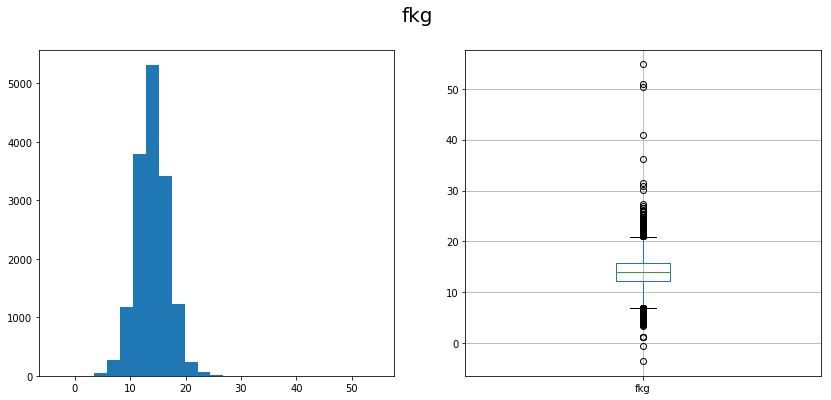

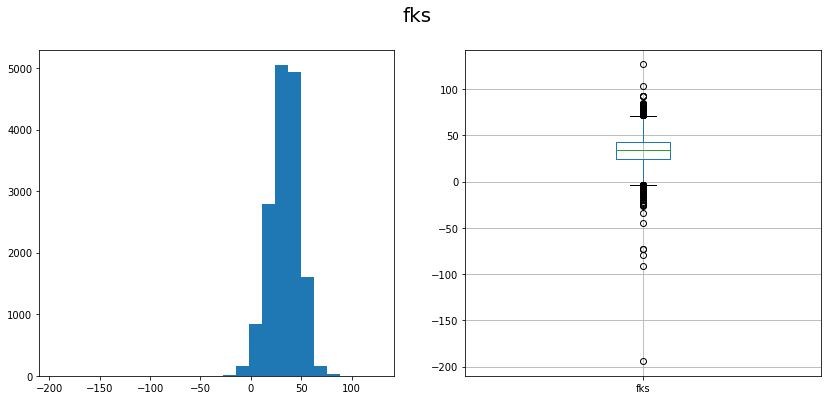

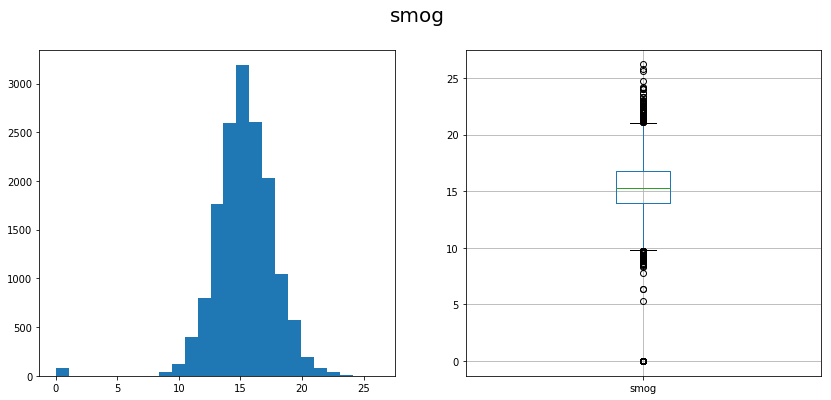

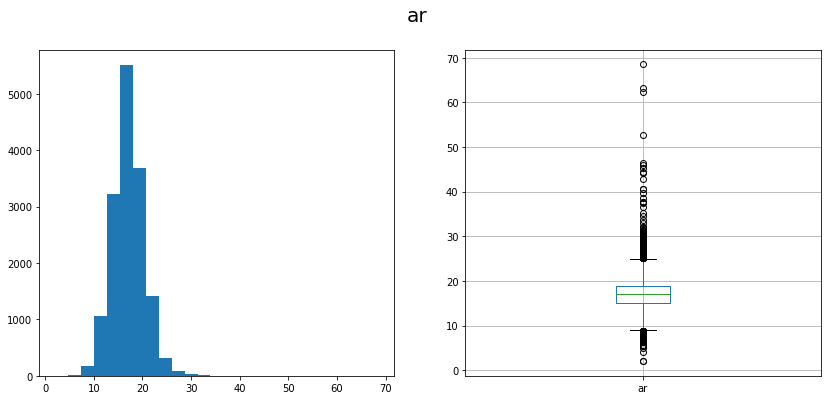

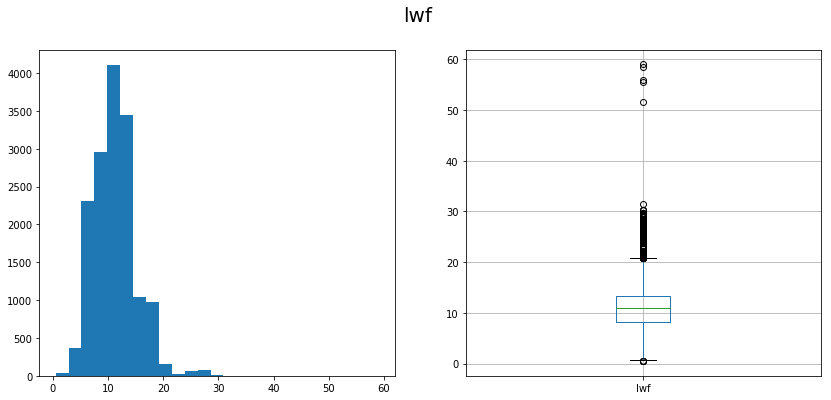

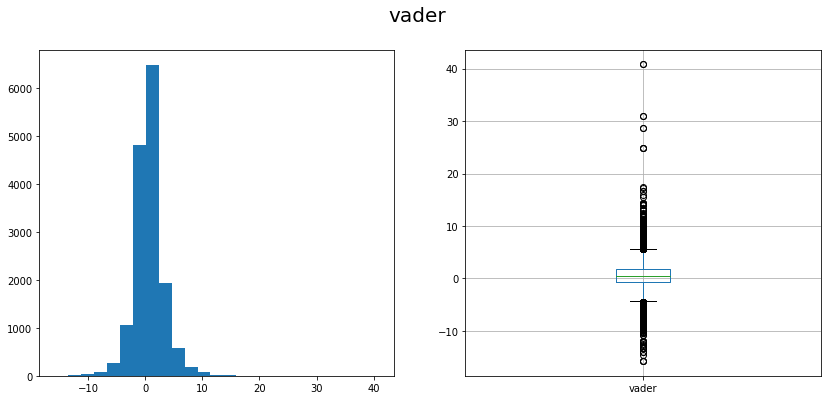

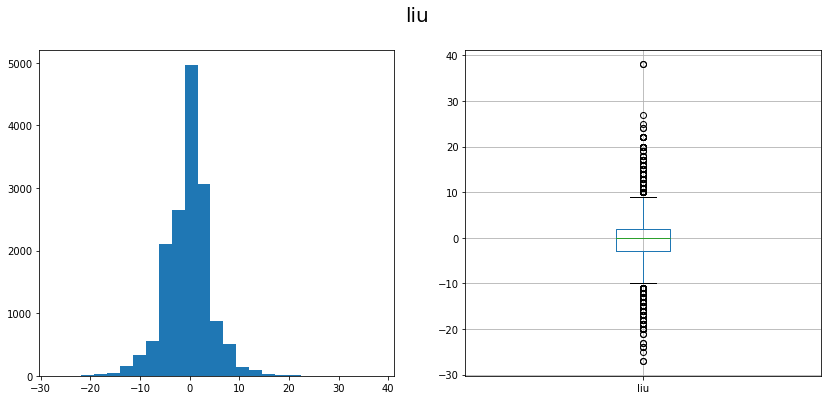

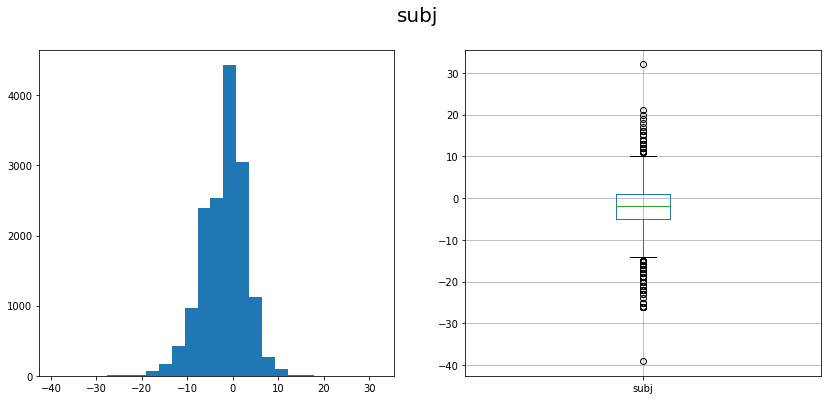

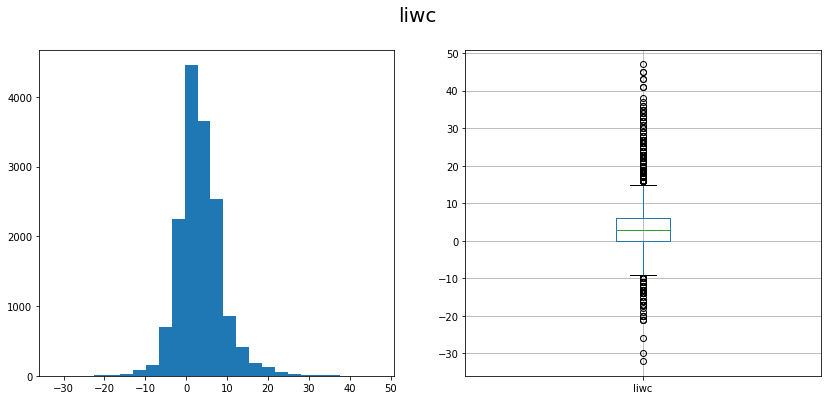

In [21]:
# Plot measures, collapsed across data type
for metric in ['fkg', 'fks', 'smog', 'ar', 'lwf', 'vader', 'liu', 'subj', 'liwc']:
    fig, ax = plt.subplots(1, 2, figsize=[14, 6])
    ax[0].hist(df[metric], bins=25);
    pd.plotting.boxplot(df, metric, ax=ax[1]);
    plt.suptitle(metric, fontsize=20)

In [22]:
# Check the average differences between data types
df.groupby('dat_type').mean()

,smog,ar,fkg,fks,lwf,vader,liu,subj,liwc,n_words,has_source_link,has_article_link,has_other_link
dat_type,,,,,,,,,,,,,
PRs,14.999788,16.880633,13.674819,39.691338,12.623308,1.236366,-0.347941,-3.621488,4.652942,329.602580,0.359781,0.4522,0.034458
Papers,15.507556,17.189821,14.109533,29.716552,10.367639,0.330823,-0.476949,-1.009180,2.441340,127.347725,NaN,NaN,NaN


/Users/tom/anaconda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


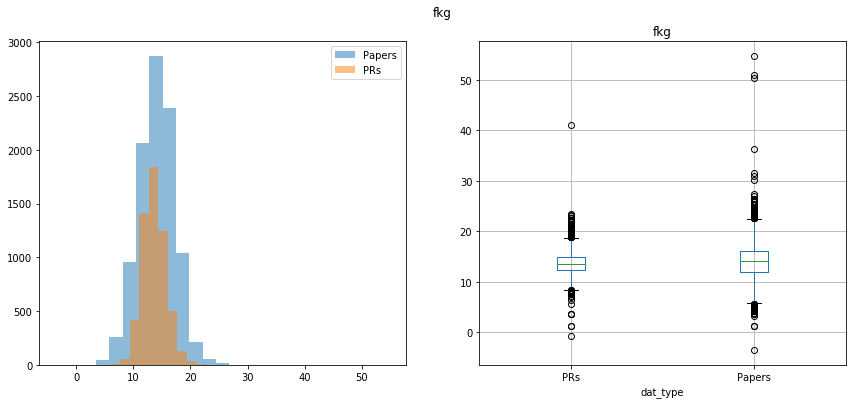

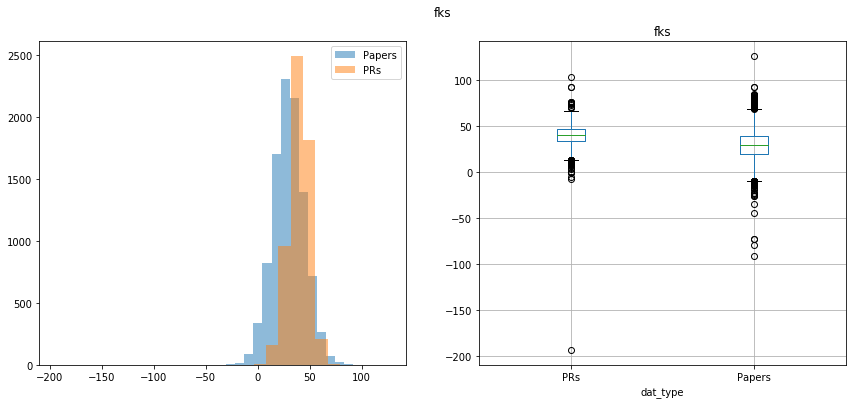

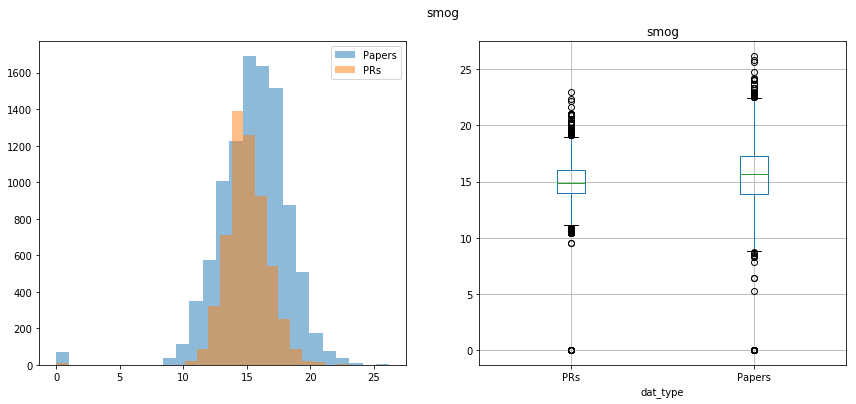

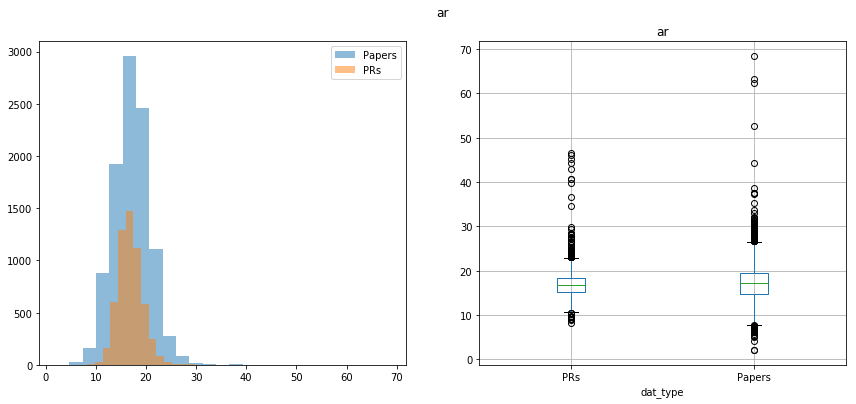

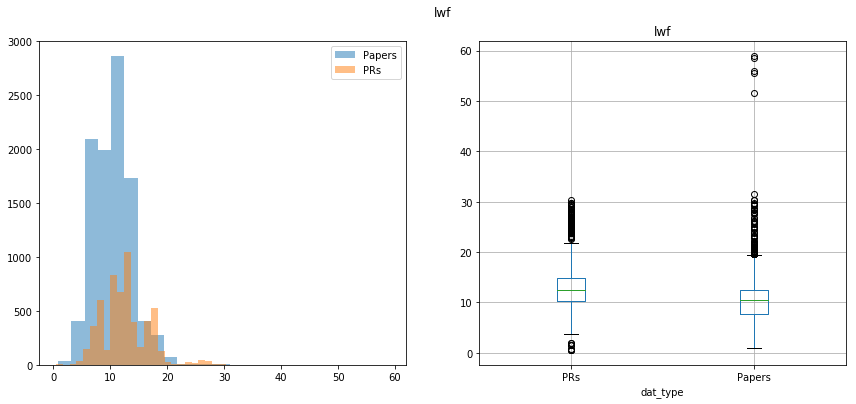

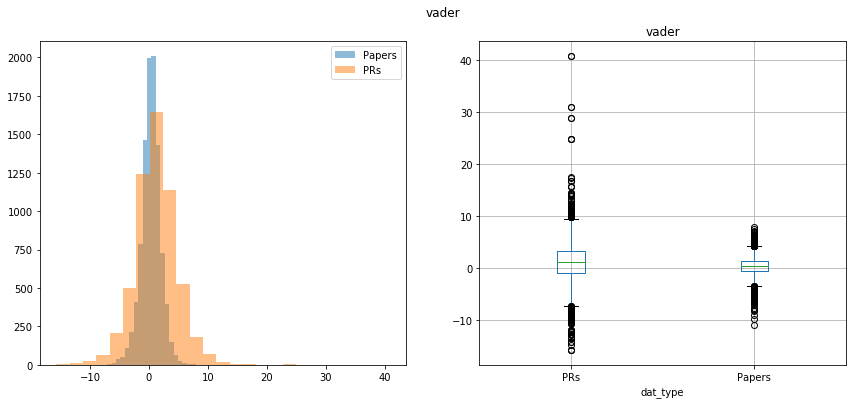

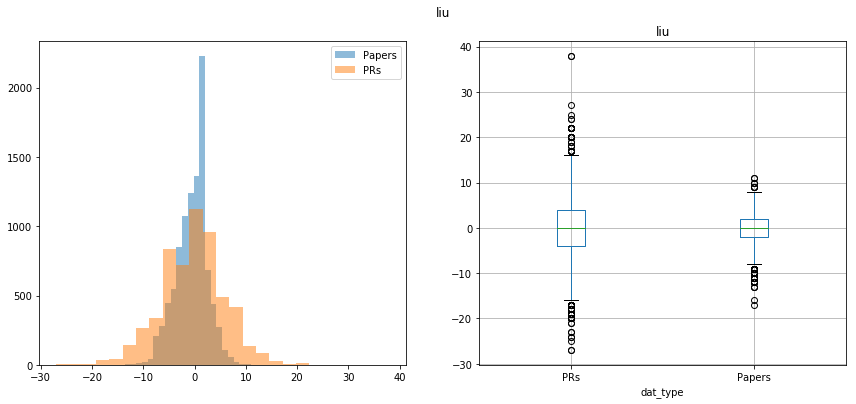

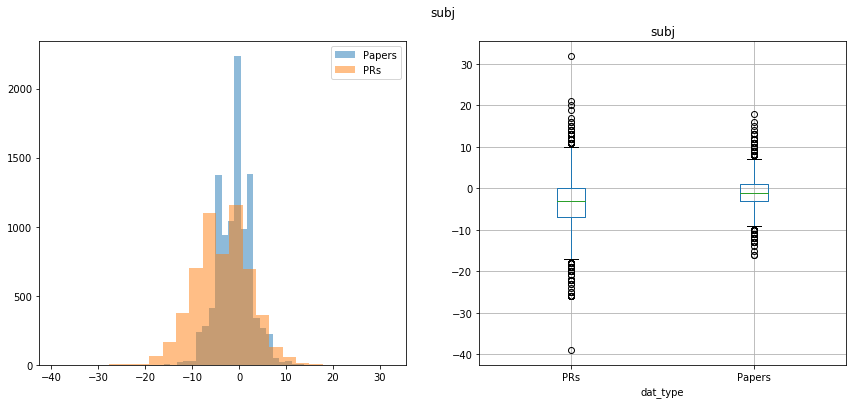

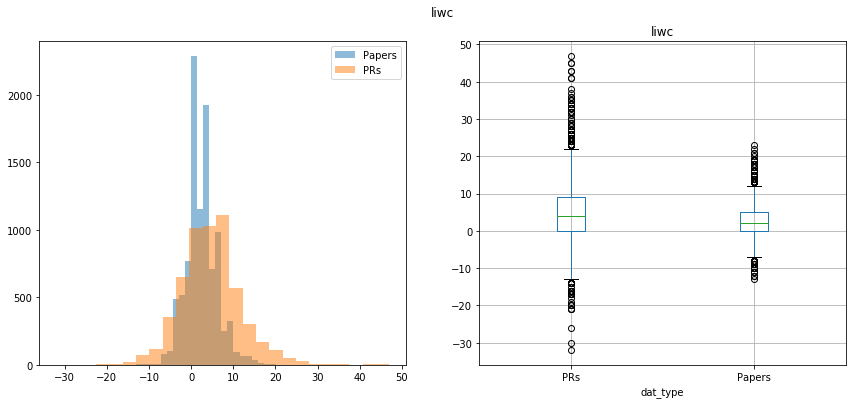

In [23]:
# Plot measures, separated by data type
for metric in ['fkg', 'fks', 'smog', 'ar', 'lwf', 'vader', 'liu', 'subj', 'liwc']:
    fig, ax = plt.subplots(1, 2, figsize=[14, 6])
    
    
    ax[0].hist(df[df.dat_type == 'Papers'][metric], bins=25, alpha=0.5, label='Papers');
    ax[0].hist(df[df.dat_type == 'PRs'][metric], bins=25, alpha=0.5, label='PRs');
    ax[0].legend()
    
    pd.plotting.boxplot(df, metric, 'dat_type', ax=ax[1])
    
    plt.suptitle(metric)

# STATISTICS!

In [24]:
from statistics import mean, stdev
from math import sqrt

from scipy.stats import ttest_ind
from scipy import stats

In [25]:
# Define Cohen's D
def cohens_d(d1, d2):
    return (mean(d1) - mean(d2)) / (sqrt((stdev(d1) ** 2 + stdev(d2) ** 2) / 2))

In [26]:
#
for metric in ['fkg', 'fks', 'smog', 'ar', 'lwf', 'vader', 'liu', 'subj', 'liwc']:
    print(metric, '\t', ttest_ind(df[df.dat_type == 'Papers'][metric], df[df.dat_type == 'PRs'][metric]))

fkg 	 Ttest_indResult(statistic=9.1130081497756308, pvalue=8.9713980681973013e-20)
fks 	 Ttest_indResult(statistic=-44.231291106794679, pvalue=0.0)
smog 	 Ttest_indResult(statistic=12.59629408100694, pvalue=3.3231201842414347e-36)
ar 	 Ttest_indResult(statistic=5.5402441819968953, pvalue=3.0694630044726793e-08)
lwf 	 Ttest_indResult(statistic=-36.052577448150217, pvalue=1.9073239585859715e-273)
vader 	 Ttest_indResult(statistic=-20.722619370875389, pvalue=4.0203905064232537e-94)
liu 	 Ttest_indResult(statistic=-1.7125099642724622, pvalue=0.086822640686587654)
subj 	 Ttest_indResult(statistic=34.65707487035926, pvalue=1.3505873868330361e-253)
liwc 	 Ttest_indResult(statistic=-24.892028166351185, pvalue=3.7547839295372168e-134)


In [27]:
#
for metric in ['fkg', 'fks', 'smog', 'ar', 'lwf', 'vader', 'liu', 'subj', 'liwc']:
    print(metric, '\t', cohens_d(df[df.dat_type == 'Papers'][metric], df[df.dat_type == 'PRs'][metric]))

fkg 	 0.160051946035
fks 	 -0.77249337476
smog 	 0.221607352143
ar 	 0.0964254952449
lwf 	 -0.589543278602
vader 	 -0.31147028937
liu 	 -0.0260561050473
subj 	 0.540886216199
liwc 	 -0.380739136234


## ANOVA (?)

Maybe something to do. 

In [31]:
stats.f_oneway?